#  <center> Heart Disease Prediction - Exploratory Data Analysis </center>

### Problem Statement

 - Cardiovascular disease or heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease. From WHO statistics every year 17.9 million dying from heart disease. The medical study says that human life style is the main reason behind this heart problem. Apart from this there are many key factors which warns that the person may/maynot getting chance of heart disease.
 

### DataSet Collection Source 

 - Datasource Collection: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
 - The Data consists of 1025 rows and 14 columns

### **About the Data set**

 - This dataset gives the information realated to heart disease. Dataset contain 13 columns, target is the class variable which is affected by other 12 columns. Here the aim is to classify the target variable to (disease\non disease) using different machine learning algorithm and findout which algorithm suitable for this dataset.
<br><br>
 - Age 
 - Gender 
 - Chest Pain Type
 - Resting Blood Pressure
 - Serum Cholesterol 
 - Fasting Blood Sugar 
 - Resting Electrocardiographic Results
 - Maximum Heart Rate Achieved
 - Exercise induced angina
 - Depression induced by exercise relative to rest
 - Slope of the Peak Exercise ST Segment
 - Number of Major Vessels Colored by Fluoroscopy
 - Thalassemia
 - Target 

['scaler.pkl']

In [1]:
import sklearn
print(sklearn.__version__)


1.2.1


In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("heart.csv")

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 1. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check Data type
- Check statistics of data set
- Check various specifications present in the different columns

### 1.1 Checking Missing Values

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Insight:

- No Missing Values in the Dataset

### 1.2 Checking Dupliactes

In [5]:
data.duplicated().sum()

np.int64(1)

### Insight:

- There are 723 duplicates values in the data set

### 1.3 Checking Datatypes

In [6]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Insight:

- All Columns contains are Integers and Float Values

### 1.4 Check statistics of data set

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 1.5 Check various specifications present in the different columns

In [8]:
col = data.columns
col

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
cat_col = []
num_col = []

for i in col:
    if data[i].dtype==object:
        cat_col.append(i)
    else:
        num_col.append(i)

In [10]:
print(cat_col)

print(num_col)

[]
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


### Insight:

- No Categorical Columns but all are Numerical Columns

## 2. Data Visualisation

### 2.1 Checking Gender Specifications

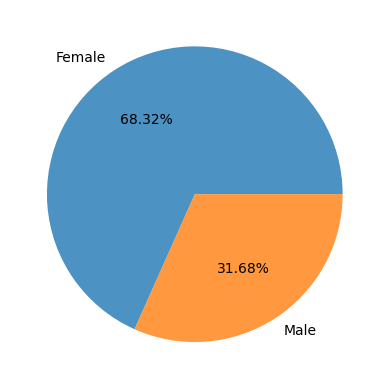

In [11]:
plt.pie(data['sex'].value_counts(),labels=['Female', 'Male'], autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
plt.show()

### 2.2 Checking Chest Pain Specifications

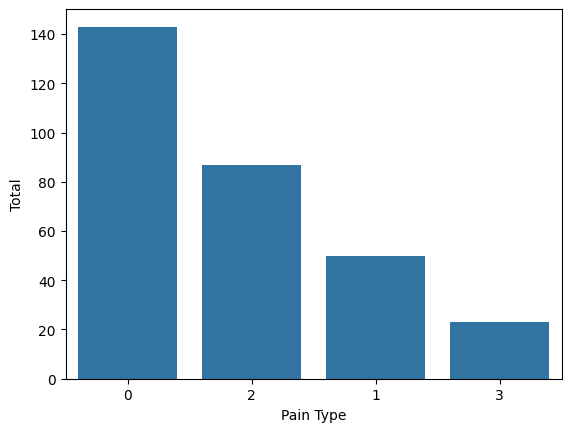

In [12]:
sns.countplot(x='cp',data=data,order=data['cp'].value_counts().index)
plt.xlabel('Pain Type')
plt.ylabel('Total')
plt.show()

### 2.3 Checking Target Varaible Specifications

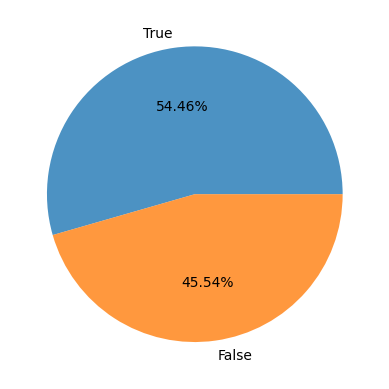

In [13]:
plt.pie(data['target'].value_counts(),labels=['True', 'False'], autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
plt.show()

### 2.4 Heart Disease Distribution based on Gender

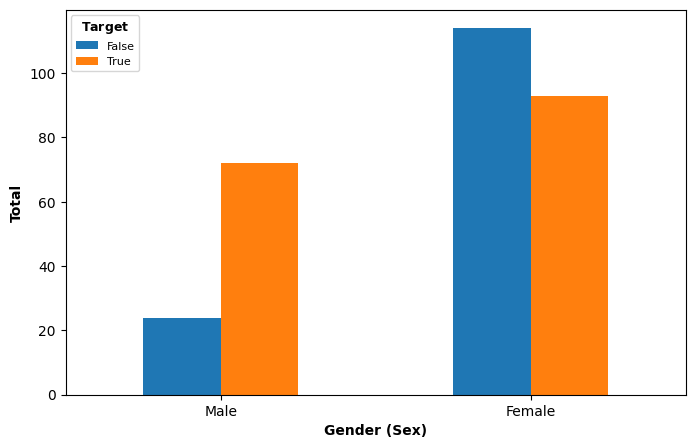

In [14]:
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Male', 'Female']
ax = pd.crosstab(data.sex, data.target).plot(kind='bar', figsize=(8, 5))
plt.xlabel('Gender (Sex)', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.xticks(label_gender, label_gender2, rotation=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', title_fontsize='9', loc='upper left', frameon=True);


### 2.5 Chest Pain vs Gender

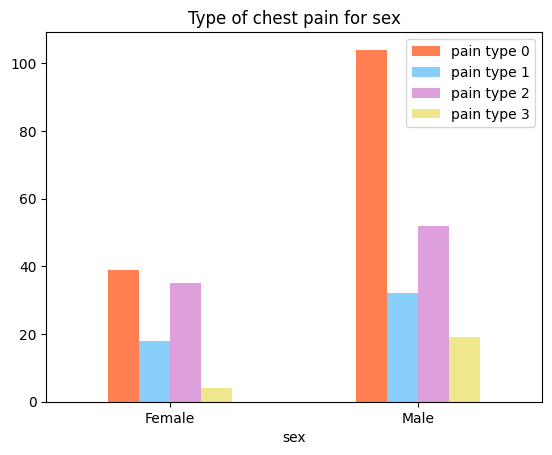

In [15]:
fig = pd.crosstab(data.sex, data.cp).plot(kind = 'bar', color = ['coral', 'lightskyblue', 'plum', 'khaki'])
plt.title('Type of chest pain for sex')
fig.set_xticklabels(labels=['Female', 'Male'], rotation=0)
plt.legend(['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3']);